

```
# Als Code formatiert
```

# CSII 2024 Exercise 09: Introduction to MIMO Systems


Reference:
- [Python Control Systems Library](https://python-control.readthedocs.io/en/0.9.3.post2/steering.html)
- Karl J. Astrom and Richard M. Murray 23 Jul 2019

## CS II Bot Position Control
We want to control the position of the CS II Bot, which you have already seen in the first Lecture. The dynamics are given in the Equation below and a graphical representation of the system is shown in Fig. 1.

\\

$$
\dot x(t) = \dfrac{d}{dt} \left[\begin{array}{c} d(t) \\ \varphi(t) \end{array} \right] = \left[\begin{array}{c} v(t)\,sin\,\varphi(t) \\ \omega(t) \end{array} \right] = \left[\begin{array}{c} u_1(t)\,sin\,x_2(t) \\ u_2(t) \end{array} \right] \;\;\;\ y(t) = \left[\begin{array}{c} 1&0 \\ 0&1 \end{array} \right]
$$

\\

The state of the system is described by the lateral position $x_1(t) = d(t)$ and the orientation $x_2(t) = φ(t)$, which can be controlled by the linear (_v(t)_) and angular (_$ω(t)$_) speeds exerted by the motors (explicitly: $\left[\begin{array}{c} V_{left}(t)&V_{right}(t) \end{array} \right] → [\begin{array}{c} v(t)&ω(t) \end{array}])$.

As we have multiple inputs and multiple outputs, we need to deal with a MIMO system.

Include graphical representation of the Duckiebot.

##Exercise 1: MIMO System Matrices

*   Derive the systems matrices by hand (you do not need to program the calculation)
*   Implement the derived system matrices in the function "sys_matrices" and return the results as a tuple.
*   Extend the system matrices and extract the number of inputs and outputs

\\

The given CS II Bot is modeled as a nonlinear system. In order to describe it using the system matrices, we need to linearize it around its equilibrium point which is given as:

\\

<center>
$f(x_{eq}, y_{eq}) = 0 \rightarrow x_{eq} = (d, 0), \;\; u_{eq} = (v, 0)$
</center>

\\

Using this, derive the system matrices A, B, C, D and then implement them in the cell below. Take care of the appropriate dimensions!

\

Hints:

*   The [numpy](https://numpy.org/doc/stable/user/absolute_beginners.html) library is very useful to implement vectors and matrices!

*   If you need to review the formula for linearization, you can take a look at the Lecture slides from week 1.


### Exercise 1.1: System Matrices

Calculate the system matrices by hand and then proceed by implementing the results in the given function.

In [ ]:
import numpy as np

"""
Set v = 3
"""

def sys_matrices():
    #TODO:


    return A, B, C, D


# If you want to check the output of the function, just use (uncomment) the following command:

# print(sys_matrices())

### Exercise 1.2: Extension to the CS II Bot

Now we want to extend our CS II Bot by adding

In [ ]:


num_outputs = "your answer goes here"
num_inputs = "your answer goes here"

##Exercise 1 Solution:

In [ ]:
import numpy as np

"""
Set v = 2
"""

"""
Input: None
Output: System matrices (type: array) A, B, C, D as a tuple
Function: Definition of system matrices (2 x 2 as we have two inputs, two outputs and two states!)
"""

def sys_matrices():
    #TODO:
    A = np.array([[0, 2], [0, 0]], dtype=int)
    B = np.array([[0, 0], [0, 1]], dtype=int)
    C = np.array([[1, 0], [0, 1]], dtype=int)
    D = np.array([[0, 0], [0, 0]], dtype=int)

    return A, B, C, D

print(sys_matrices())

(array([[0, 2],
       [0, 0]]), array([[0, 0],
       [0, 1]]), array([[1, 0],
       [0, 1]]), array([[0, 0],
       [0, 0]]))


##Exercise 2: MIMO Transferfunction of Duckiebot

The goal of this task is to use the previously derrived state space description and from there calculate the MIMO transferfunction. For this we use the well-known formula $$ P(s) = C \cdot (sI-A)^{-1} \cdot B + D $$
with $ (sI-A)^{-1} = \frac{adj(SI-A)}{det(sI-A)} $

Use the following codeblock to implement this formula. Consider the dimensionality of P(s)!

First calculate it manually using symbolic math. In a second step use scipy.signal to calculate it. The output of the latter outputs the coefficients of the numerator and denominator as two arrays.

Hint: use the sympy functions 'Matrix', 'Symbols', 'inv' and 'symplify'

In [ ]:
# ** Exercise 2.1: the goal of this function is to implement the general transferfunction in dependence of s = j*omega as known from the paper exercise sets ** ##

import numpy as np
import sympy as sp # to handle symbolic math with 's'
from sympy.abc import s

# Define the state-space matrices A, B, C, and D for test purposes
v = sp.symbols('v')
A = np.array([[0, v], [0, 0]])
B = np.array([[0, 0], [0, 1]])
C = np.array([[1, 0],[0, 1]])
D = np.array([[0, 0], [0, 0]])

#inputs: numpy matrices A, B, C, D representing the state space matrices derrived in Exercise XX
#intended output: numpy matrix P_s representing the MIMO transferfunction matrix in dependence of the symolic variable 's'
#TASK: calculate the transferfunction P(s) from the State Space matrices A, B, C using the formula above
def calc_symbolic_tf(A: np.array, B: np.array, C: np.array, D: np.array)-> sp.Matrix:

  # define identity matrix of appropriate size


  # calculate the inverse of (s*I - A)


  # calculate P_s


  # simplify the answer so that there are no double fractions



  return P_s


# execute and test your function
print('The transferfunction of the state space matrices A, B, C and D are P(s) = \n' )
print(calc_symbolic_tf(A,B,C,D))

The transferfunction of the state space matrices A, B, C and D are P(s) = 

[[0, 1.0*v/s**2], [0, 1.0/s]]


In the following we want to calculate the specific transferfunction in dependance of a determined frequency ω.

In [ ]:
## ** Exercise 2.2: the goal of this exercise is to calculate the specific response of a certain frequency omega in the system ** ##

import numpy as np

# Define the state-space matrices A, B, C, and D for test purposes
v = 3
A = np.array([[0, v], [0, 0]])
B = np.array([[0, 0], [0, 1]])
C = np.array([[1, 0],[0, 1]])
D = np.array([[0, 0], [0, 0]])
omega = 0


#inputs: numpy matrices A, B, C, D representing the state space matrices derrived in Exercise XX as well as input frequency omega
#intended output: numpy matrix P_s representing the MIMO transferfunction matrix in dependence of a distinct frequency omega
#TASK: calculate the transferfunction P(s) from the State Space matrices A, B, C using the formula above
def calc_tf_omega(A: np.array, B: np.array, C: np.array, D: np.array, omega:float)-> np.matrix:


  # identity matrix of appropriate size


  # calculate transferfunction




  return P_omega

print('The transferfunction of the state space matrices A, B, C and D for the frequency omega are P(s) = \n' )
print(calc_tf_omega(A,B,C,D,omega))

The transferfunction of the state space matrices A, B, C and D for the frequency omega are P(s) = 



NameError: ignored

##Exercise 2 Solution:

In [1]:
## ** Exercise 2.1 solution: the goal of this function is to implement the general transferfunction in dependence of s = j*omega as known from the paper exercise sets ** ##

import numpy as np
import sympy as sp
from sympy.abc import s # to handle symbolic math with 's'. You can now use the symbol s in your calculations as just another variable / symbol

# Define the state-space matrices A, B, C, and D for test purposes
v = sp.symbols('v')
A = np.array([[0, v], [0, 0]])
B = np.array([[0, 0], [0, 1]])
C = np.array([[1, 0],[0, 1]])
D = np.array([[0, 0], [0, 0]])


#inputs: numpy matrices A, B, C, D representing the state space matrices derrived in Exercise XX
#intended output: numpy matrix P_s representing the MIMO transferfunction matrix in dependence of the symolic variable 's'
#TASK: calculate the transferfunction P(s) from the State Space matrices A, B, C using the formula above
def calc_symbolic_tf(A: np.array, B: np.array, C: np.array, D: np.array)-> sp.Matrix:

  # Define 's' as the Laplace variable
  #s = sp.symbols('s')

  # define identity matrix of appropriate size
  I = np.eye(A.shape[0])

  # calculate the inverse of (s*I - A)
  term = sp.Matrix(s* I - A)
  inv_term = term.inv()

  # calculate P_s
  P_s = np.dot(C, np.dot(inv_term, B)) + D

  # simplify the answer so that there are no double fractions
  P_s = sp.simplify(P_s)

  return P_s


# execute and test your function
print('The transferfunction of the state space matrices A, B, C and D are P(s) = \n' )
P_s = calc_symbolic_tf(A,B,C,D)
print(P_s)




The transferfunction of the state space matrices A, B, C and D are P(s) = 

[[0, 1.0*v/s**2], [0, 1.0/s]]


In [2]:
## ** Exercise 2.2 solution: the goal of this exercise is to calculate the specific response of a certain frequency in the system ** ##

import numpy as np

# Define the state-space matrices A, B, C, and D for test purposes
v = 3
A = np.array([[0, v], [0, 0]])
B = np.array([[0, 0], [0, 1]])
C = np.array([[1, 0],[0, 1]])
D = np.array([[0, 0], [0, 0]])
omega = 1


#inputs: numpy matrices A, B, C, D representing the state space matrices derrived in Exercise XX as well as input frequency omega
#intended output: numpy matrix P_s representing the MIMO transferfunction matrix in dependence of a distinct frequency omega
#TASK: calculate the transferfunction P(s) from the State Space matrices A, B, C using the formula above
def calc_tf_omega(A: np.array, B: np.array, C: np.array, D: np.array, omega:float)-> np.matrix:

  # define s in dependance of omega
  s = omega * 1j

  # identity matrix of appropriate size
  I = np.eye(A.shape[0])

  # calculate transferfunction
  P_omega = np.dot(C, np.linalg.inv(s * I - A)).dot(B) + D

  return P_omega

print('The transferfunction of the state space matrices A, B, C and D for the frequency omega are P(s) = \n' )
print(calc_tf_omega(A,B,C,D,omega))


The transferfunction of the state space matrices A, B, C and D for the frequency omega are P(s) = 

[[ 0.+0.j -3.+0.j]
 [ 0.+0.j  0.-1.j]]


##Exercise 3: MIMO poles and zeroes calculation

The goal of this task is to use the previously derrived transferfunction matrix $P(s)$ to calculate the poles $\pi_i$ and the zeroes $z_i$. Remember the procedure discussed in the lecture. First task is to calculate the determinant of all the minors of P.
- Then the corresponding poles are the zeroes (in a mathematical sense - makes the denominator go to zero) of the **least common denominator** of _all_ the minors of $P(s)$ That means you calculate all the poles of the all the minors' denominator and then extract the least common occurance of all of them.
- The zeroes are the zeroes of the **numerator's greatest common divisor** of the maximal minors (maximal in terms of dimension) after the normalization with respect to the same (pole-)polynomial

The content of the following codepart is to implement three functions: the first one which calculates the determinant of all the minors, one which calculates the poles and one that calculates the zeroes. To make the task simpler, we only consider$ P(s) ∈  \mathbb {R}^{2x2}$.




###Example 3.1 Calculation of the poles:

Consider $$
P(s) = \begin{bmatrix}
    \frac{s+2}{s+3} & 0 \\
    0 & \frac{(s+1)(s+3)}{s+2}
\end{bmatrix}
$$

then the determinants first order minors are

$$ \frac{s+2}{s+3}, \frac{(s+1)(s+3)}{s+2}, 0, 0$$

and the determinant of the second order minor is
$$ (s+1)$$

This makes the least common denominator of all the minors $$(s+3)(s+2)$$ which corresponds to the pole polynomial -> poles are $π_1 = -3, \pi_2 = -2$



###Example 3.2 Calculation of the zeroes:

For the calculation of the zeroes one needs to first determine (all) the maximum minors, which in the above example is the 2nd order minor $(s+1)$
For each of the maximum minors, one needs to normalize it by the polepolynomial $$(s+3)(s+2)$$ This means solving the equation $$ maxminor_i = zeropolynomial_i / polepolynomial$$ for **_all_** the maximum minors, which in this case corresponds to ZP = $$ ZP = (s+1)(s+2)(s+3) $$
In case there are multiple maximum minors, the zeropolynomial is the greatest common factor between all the ZP.

_Remark: Consider that poles and zeroes have a 'direction' associated with them, so the only cancel each other in the same direction. That means it is possible to have poles and zeroes with the same numerical value._


In [ ]:
## ** Exercise 3: Implementation of three functions:
## 1. to extract all the minors of a 2 x 2 Matrix
## 2. to calculate all the poles
## 3. to calculate all the zeroes

##Exercise 3 solution: MIMO poles and zeroes calculation

In [ ]:
## ** Exercise 3 solution: Implementation of three functions:
## 1. to extract all the minors of a 2 x 2 Matrix
## 2. to calculate all the poles
## 3. to calculate all the zeroes

import numpy as np
import sympy as sp
from sympy.abc import s
from sympy import simplify, fraction

# Define the variable using sympy
v = sp.symbols('v')

# Define the polynomials for the matrix entries as fractions, enter them from result of exercise 2.1
a = 3*s/(s+1)
b = v / s**2
c = s
d = 1 / s

# Create the matrix with polynomial fraction entries
P_s = sp.Matrix([
    [a, b],
    [c, d]])

# Function to extract all minors of P_s
# Input: the symbolic representation of the Transferfunction P_s
# Output: an array containing all minors of P_s
def compute_minors_mimo(P_s: sp.Matrix):

    minors = []

    #iterate over outputs and inputs to find 1st order minors
    for i in range(P_s.shape[0]): #iterate over outputs (columns)
        for j in range(P_s.shape[1]): #iterate over inputs (rows)

            minors.append(P_s.row(j).col(i))

    #calculate second order minor (det of P_s)
    det_P_s = P_s.det()
    minors.append(det_P_s)
    #print(minors)

    return minors


# Function to compute poles of the minors
# Input: an array containing all minors of a MIMO transferfunction P_s
# Output: a single list of the systems poles corresponding to the minors pf P_s
def compute_poles_mimo(minors: sp.Matrix):

    # set flag to be used later in the calculation of the least common denominator of all minors
    flag = False

    # define list of poles to be calculated later as output
    poles_list = []

    #iterate over all minors
    for i in range(len(minors)):

        # Extract the denominator expression of the current minor
        current_minor = minors[i]
        print(current_minor)
        numerator, denominator = current_minor.as_numer_denom()


        # Calculate the poles of the transfer function of the current minor
        potential_poles = sp.solve(denominator, s)

        # create a temporary list of poles to compare existing poles to satisfy least common denominator condition
        working_poles_list = poles_list

        # compare all of the minor's poles to extract least common denominator (=poles of P_s) using flag
        for j in range(len(potential_poles)): #iterate over all the poles of that minor
          current_test_pole = potential_poles[j]
          for k in range(len(working_poles_list)): #iterate and compare with all existing poles
            if current_test_pole == working_poles_list[k]: #check in each iteration if unique instance of pole is already present
              flag = True; #if yes, set a flag

          if flag == True:
            working_poles_list.remove(current_test_pole) #if flag is true, remove pole from working list to allow possible future unique instances.
          else:
            poles_list.append(current_test_pole) #if flag is false, current instance of pole is unique and can be added to the systems pole_list

    print(poles_list)

    return poles_list


# Function to compute the zeroes of the system P_s represented by the pole polynomial and the maximum minor.
# Inputs: the maximal minor corresponding to det(P_s) and the pole polynomial represented by the list of polesof the system
# Output: a single list of all the systems zeroes
# Remark: As this system is only 2x2, only the det(P_s) will be considered for the zeroes
def compute_zeroes_mimo(max_minor, pole_list):


  # define list of zeroes to be computed and outputted
  zeroes_list = []

  # extract the numerators and denominators of the maxumim minors
  max_minor_numerator, max_minor_denominator = max_minor.as_numer_denom()
  print(max_minor_denominator)

  # calculate the poles and zeroes of the max_minor
  max_minor_zeroes = sp.solve(max_minor_numerator, s)
  max_minor_poles = sp.solve(max_minor_denominator, s)
  print(max_minor_poles)
  print(pole_list)

  # test if one can cancel out any poles of the denominator of the maximum minor - solve the equation stated above in example 3.2
  for i in range(len(pole_list)):
    for j in range[len(max_minor_poles)]:
      if pole_list[i] == max_minor_poles[j]:
        pole_list.remove(i)   # cancel out poles with denominator
        max_minor_poles.remove(j) # "
        break
  # combine the not cancelled poles with the max_minor numerator roots
  zeroes_list = np.concatenate(pole_list, max_minor_zeroes) # multiply the max_minor numerator with the pole polynomial, in which some poles have been cancelled out with the denominator of the max_minor

  return zeroes_list


# Compute zero and pole polynomials for MIMO
minors = compute_minors_mimo(P_s)
#poles = compute_poles_mimo(minors)
zeroes = compute_zeroes_mimo(((3-v)*s + v )/(s*(s+1)), [0,0,-1])


s*(s + 1)
[-1, 0]
[0, 0, -1]


TypeError: ignored

##Exercise 4: Plotting Unit Impulse Response

*   Create a new variable to store the Transfer Function from Exercise 2.
*   Calculate the Impulse Response using the scipy.signal class.
*   Plot the amplitude over time for the impulse response. Set a title and label the axes.

\\

The unit impulse response of a system is given by the inverse Laplace transform of the transfer function according to this relation:

\\
<center>
$p(t) = \mathcal{L}^{-1}\{P(s)\}$
</center>

\\

The goal of this task is to calculate and plot the impulse response for the transfer function from Exercise 2.

\

Hint:

Use the [scipy](https://docs.scipy.org/doc/scipy/reference/signal.html) library to calculate the impulse response and then plot it using the [matplotlib](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) library.

First we import the necessary libraries for this task by running the following cell:

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

###Exercise 4.1: Store Transfer Function from Exercise 2

Create a new variable "P_s" and assign the already calculated Transfer Function from Exercise 2 to it. To check the value of our newly created variable "P_s", we print it in the last (7th) line of code.

In [ ]:
# TODO:

P_s =

# For Testing purposes:

print(P_s)

### Exercise 4.2: Impulse Response

Calculate the impulse response of the system by using the signal class from the scipy library.

In [ ]:
# TODO:

time, response =

### Exercise 4.3: Plotting

Plot the amplitude over time for the impulse responnse by using the matplotlib library. In order to not forget what we've just done set a title and label the axes.

In [ ]:
# TODO:


# Now we take a look at the result:
plt.grid(True)
plt.show()

##Exercise 4 Solution:

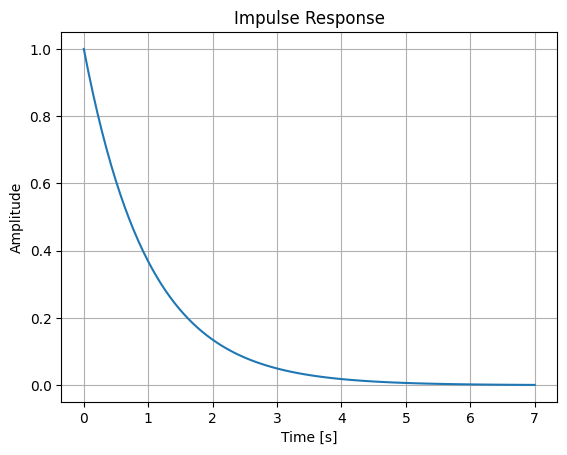

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt


# TODO: Create a new variable to store the Transfer Function from Exercise 2.

P_s = signal.TransferFunction([1], [1, 1])


# TODO: Calculate the Impulse Response using the scipy.signal class.

time, response = signal.impulse(P_s)


# TODO: Plot the amplitude over time for the impulse response. Set a title and label the axes.

plt.plot(time, response)
plt.title('Impulse Response')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()